In [1]:
from math import ceil

import pandas as pd
import seaborn as sns
import torch
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams['font.family'] = 'Times New Roman'

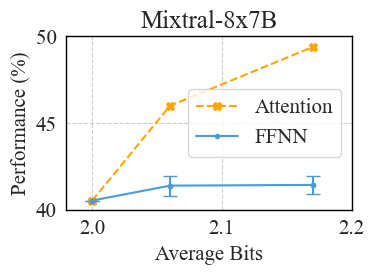

In [21]:
data = {
    'bits': [2, 2.06, 2.17],
    'mean': [40.53, 41.39, 41.43],
    'std': [0.00, 0.57, 0.52],
    'attn': [40.53, 46.00, 49.39]
}

# Creating a DataFrame
df = pd.DataFrame(data)
# Plotting
sns.set_style("whitegrid")
sns.set_palette("colorblind")
font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 15}
plt.rc('font', **font)
plt.figure(figsize=(4, 3))

ax = plt.gca()
ax.grid(which='major', axis='both', linestyle='--')

# Plot line for mean values
plt.plot(df['bits'], df['attn'], label='Attention', color='#FFA500', linestyle='--', marker='X')
plt.plot(df['bits'], df['mean'], label='FFNN', color='#4B9CD3', linestyle='-', marker='.')
# Add error bars
plt.errorbar(df['bits'], df['mean'], yerr=df['std'], fmt='.', color='#4B9CD3', capsize=5)

# ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

# Adding titles and labels
plt.title('Mixtral-8x7B')
plt.xlabel('Average Bits')
plt.ylabel('Performance (%)')
plt.legend()

ax.set_xticks([2, 2.1, 2.2])
ax.set_yticks([40.00, 45.00, 50.00])
ax.set_xlim([1.98, 2.2])


def _set_boarder(spine):
    spine.set_color('black')
    spine.set_linewidth(1.)


_set_boarder(ax.spines['left'])
_set_boarder(ax.spines['bottom'])
_set_boarder(ax.spines['right'])
_set_boarder(ax.spines['top'])

# Show plot
plt.tight_layout()
plt.savefig('ffnn_vs_attn_mixtral.svg', dpi=300)

In [ ]:
data = {
    'bits': [2, 2.06, 2.17],
    'mean': [49.44, 41.39, 41.43],
    'std': [0.00, 0.57, 0.52],
    'attn': [49.44, 57.48, 49.39]
}

# Creating a DataFrame
df = pd.DataFrame(data)
# Plotting
sns.set_style("whitegrid")
sns.set_palette("colorblind")
font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 14}
plt.rc('font', **font)
plt.figure(figsize=(4.5, 3))

ax = plt.gca()
ax.grid(which='major', axis='both', linestyle='--')

# Plot line for mean values
plt.plot(df['bits'], df['attn'], label='Attention', color='#FFA500', linestyle='--', marker='X')
plt.plot(df['bits'], df['mean'], label='FFNN', color='#4B9CD3', linestyle='-', marker='.')
# Add error bars
plt.errorbar(df['bits'], df['mean'], yerr=df['std'], fmt='.', color='#4B9CD3', capsize=5)

ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

# Adding titles and labels
plt.title('Mixtral-8x7B')
plt.xlabel('Average Bits')
plt.ylabel('Performance (%)')
plt.legend(loc="right")

ax.set_xticks([2, 2.1, 2.2])
ax.set_yticks([40.00, 45.00, 50.00])
ax.set_xlim([1.98, 2.2])


def _set_boarder(spine):
    spine.set_color('black')
    spine.set_linewidth(1.)


_set_boarder(ax.spines['left'])
_set_boarder(ax.spines['bottom'])
_set_boarder(ax.spines['right'])
_set_boarder(ax.spines['top'])

# Show plot
plt.tight_layout()
plt.savefig('ffnn_vs_attn_deepseek.svg', dpi=300)

In [55]:
# Create a color map
cmap = LinearSegmentedColormap.from_list("custom_blue", ["white", "#4B9CD3", "#151515"])
# cmap = LinearSegmentedColormap.from_list("custom_blue", ["#e7f5ff", "#d0ebff", "#a5d8ff", "#74c0fc", "#4dabf7", "#339af0", "#228be6", "#1c7ed6", "#1971c2", "#1864ab"])

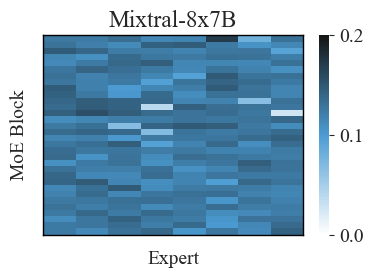

In [66]:
mixtral_rount = torch.load("/Users/lipingzhi/Downloads/routing-count.pt")
mixtral_frequency = mixtral_rount / torch.sum(mixtral_rount, dim=-1, keepdim=True)
sns.set_palette("colorblind")
font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 14}
plt.rc('font', **font)
plt.figure(figsize=(4, 3))
v_max = torch.max(mixtral_frequency)
v_max = ceil(v_max * 10) / 10
v_min = 0.0
ax = sns.heatmap(
    mixtral_frequency,
    cmap=cmap,
    # cmap=sns.color_palette("rocket_r", as_cmap=True),
    linewidth=0, vmax=v_max, vmin=v_min
)
# set the colorbar labels to only one decimal place
num_ticks = v_max * 10 + 1
ax.collections[0].colorbar.set_ticks([v_min + 0.1 * i for i in range(int(num_ticks))])
ax.collections[0].colorbar.set_ticklabels([f"{v_min + 0.1 * i:.1f}" for i in range(int(num_ticks))])
ax.set_title(f"Mixtral-8x7B")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel("Expert")
ax.set_ylabel("MoE Block")

def _set_boarder(spine):
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1.)

_set_boarder(ax.spines['left'])
_set_boarder(ax.spines['bottom'])
_set_boarder(ax.spines['right'])
_set_boarder(ax.spines['top'])

plt.tight_layout()
plt.savefig('mixtral_routing.svg', dpi=300)

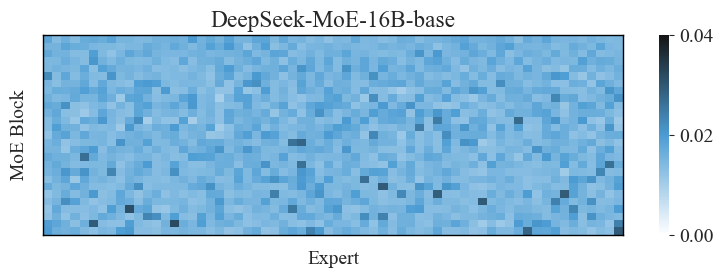

In [68]:
count = torch.load("/Users/lipingzhi/Downloads/deepseek-routing-count.pt")
frequency = count / torch.sum(count, dim=-1, keepdim=True)
sns.set_palette("colorblind")
font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 14}
plt.rc('font', **font)
plt.figure(figsize=(8, 3))
v_max = torch.max(frequency)
v_max = ceil(v_max * 50) / 50
v_min = 0.0
ax = sns.heatmap(
    frequency,
    cmap=cmap,
    # cmap=sns.color_palette("rocket_r", as_cmap=True),
    linewidth=0, vmax=v_max, vmin=v_min
)
# set the colorbar labels to only one decimal place
num_ticks = v_max * 50 + 1
ax.collections[0].colorbar.set_ticks([v_min + 0.02 * i for i in range(int(num_ticks))])
ax.collections[0].colorbar.set_ticklabels([f"{v_min + 0.02 * i:.2f}" for i in range(int(num_ticks))])
ax.set_title(f"DeepSeek-MoE-16B-base")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel("Expert")
ax.set_ylabel("MoE Block")

def _set_boarder(spine):
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1.)

_set_boarder(ax.spines['left'])
_set_boarder(ax.spines['bottom'])
_set_boarder(ax.spines['right'])
_set_boarder(ax.spines['top'])

plt.tight_layout()
plt.savefig('deepseek_routing.svg', dpi=300)

In [74]:
# layer_score = [0.87890625, 0.9609375, 0.9609375, 0.96875, 0.96875, 0.96875, 0.9765625, 0.98046875, 0.98046875, 0.98046875, 0.98046875, 0.984375, 0.984375, 0.984375, 0.98046875, 0.98046875, 0.98046875, 0.98046875, 0.98046875, 0.98046875, 0.984375, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.984375, 0.98046875, 0.9765625, 0.9453125, 0.703125]

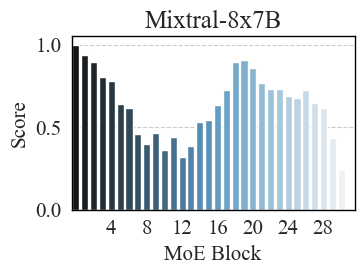

In [38]:
layer_score = torch.tensor([0.208984375, 0.1796875, 0.1611328125, 0.12109375, 0.1123046875, 0.04833984375, 0.03955078125,
               -0.0311279296875, -0.058349609375, -0.02880859375, -0.07568359375, -0.03857421875, -0.0947265625,
               -0.06396484375, 0.00089263916015625, 0.00531005859375, 0.046875, 0.0869140625, 0.1630859375, 0.16796875,
               0.1455078125, 0.10693359375, 0.09033203125, 0.0888671875, 0.06982421875, 0.06591796875, 0.0869140625,
               0.052490234375, 0.037841796875, -0.0419921875, -0.12890625, -0.2353515625])
layer_score = (layer_score - torch.min(layer_score)) / (torch.max(layer_score) - torch.min(layer_score))
sns.set_style("whitegrid")
font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 15}
plt.rc('font', **font)
plt.figure(figsize=(4, 3))

ax = plt.gca()
ax.grid(which='major', axis='both', linestyle='--')
cmap = LinearSegmentedColormap.from_list("custom_red", ["#151515", "#4B9CD3", "#F8F8F8"])
ax = sns.barplot(x=range(len(layer_score)), y=layer_score, palette=cmap, legend=False, hue=range(len(layer_score)))

# set x axis number of ticks
ax.set_xticks([4, 8, 12, 16, 20, 24, 28])
# ax.set_yticks([-0.2, 0, 0.2])
# ax.set_ylim([-0.3, 0.3])
ax.set_title("Mixtral-8x7B")
ax.set_xlabel("MoE Block")
ax.set_ylabel("Score")

def _set_boarder(spine):
    spine.set_color('black')
    spine.set_linewidth(1.)
    
_set_boarder(ax.spines['left'])
_set_boarder(ax.spines['bottom'])
_set_boarder(ax.spines['right'])
_set_boarder(ax.spines['top'])

plt.tight_layout()
plt.savefig('mixtral_block_score.svg', dpi=300)

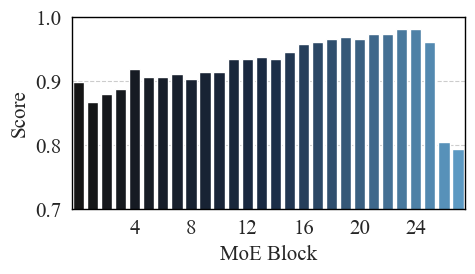

In [46]:
layer_score = torch.tensor([0.8984375, 0.8671875, 0.87890625, 0.88671875, 0.91796875, 0.90625, 0.90625, 0.91015625, 
                                    0.90234375, 0.9140625, 0.9140625, 0.93359375, 0.93359375, 0.9375, 0.93359375, 0.9453125, 
                                    0.95703125, 0.9609375, 0.96484375, 0.96875, 0.96484375, 0.97265625, 0.97265625, 0.98046875, 
                                    0.98046875, 0.9609375, 0.8046875, 0.79296875])
# layer_score = (layer_score - torch.min(layer_score)) / (torch.max(layer_score) - torch.min(layer_score))
# layer_score = torch.tensor(layer_score)
sns.set_style("whitegrid")
font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 15}
plt.rc('font', **font)
plt.figure(figsize=(5, 3))

ax = plt.gca()
ax.grid(which='major', axis='both', linestyle='--')
cmap = LinearSegmentedColormap.from_list("custom_red", ["#151515", "#13294B", "#4B9CD3"])
ax = sns.barplot(x=range(len(layer_score)), y=layer_score, palette=cmap, legend=False, hue=range(len(layer_score)))

# set x axis number of ticks
ax.set_xticks([4, 8, 12, 16, 20, 24])
ax.set_ylim([0.7, 1.0])
ax.set_xlim([-0.5, 27.5])
# ax.set_title("DeepSeek-MoE-16B-base")
ax.set_xlabel("MoE Block")
ax.set_ylabel("Score")

def _set_boarder(spine):
    spine.set_color('black')
    spine.set_linewidth(1.)
    
_set_boarder(ax.spines['left'])
_set_boarder(ax.spines['bottom'])
_set_boarder(ax.spines['right'])
_set_boarder(ax.spines['top'])

plt.tight_layout()
plt.savefig('deepseek_block_score.pdf', dpi=300)

In [47]:
outlier_score = torch.load("/Users/lipingzhi/Downloads/mixtral_linear_weight_outlier_metric.pt")

In [50]:
all_scores = []
for block_id in range(32):
    layer_scores = []
    for expert_id in range(8):
        layer_scores.append(outlier_score[f'model.layers.{block_id}.block_sparse_moe.experts.{expert_id}.w1'])
        layer_scores.append(outlier_score[f'model.layers.{block_id}.block_sparse_moe.experts.{expert_id}.w2'])
        layer_scores.append(outlier_score[f'model.layers.{block_id}.block_sparse_moe.experts.{expert_id}.w3'])
    all_scores.append(layer_scores)
all_scores = torch.tensor(all_scores)

In [62]:
all_scores[:, ::3]

tensor([55.5000, 72.3125, 60.8125, 59.3750, 58.0625, 58.3125, 60.5312, 55.5000])

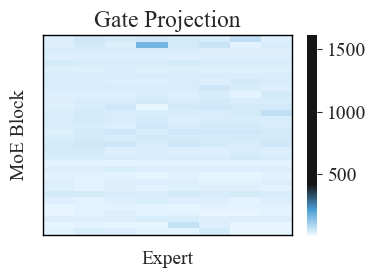

In [102]:
sns.set_palette("colorblind")
font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 14}
plt.rc('font', **font)
plt.figure(figsize=(4, 3))
cmap = LinearSegmentedColormap.from_list("custom_blue", ["#e7f5ff", "#4B9CD3", "#151515", "#151515", "#151515", "#151515", "#151515", "#151515", "#151515"])
all_w1_scores = all_scores[:, ::3]
all_w2_scores = all_scores[:, 1::3]
all_w3_scores = all_scores[:, 2::3]
weight = "w1"
if weight == "w1":
    scores = all_w1_scores
    name = "Gate Projection"
elif weight == "w2":
    scores = all_w2_scores
    name = "Down Projection"
else:
    scores = all_w3_scores
    name = "Up Projection"
ax = sns.heatmap(
    scores,
    cmap=cmap,
    # cmap=sns.color_palette("rocket_r", as_cmap=True),
    linewidth=0, vmax=all_scores.max()
)
# set the colorbar labels to only one decimal place
# num_ticks = v_max * 50 + 1
# ax.collections[0].colorbar.set_ticks([v_min + 0.02 * i for i in range(int(num_ticks))])
# ax.collections[0].colorbar.set_ticklabels([f"{v_min + 0.02 * i:.2f}" for i in range(int(num_ticks))])
ax.set_title(name)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel("Expert")
ax.set_ylabel("MoE Block")

def _set_boarder(spine):
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1.)

_set_boarder(ax.spines['left'])
_set_boarder(ax.spines['bottom'])
_set_boarder(ax.spines['right'])
_set_boarder(ax.spines['top'])

plt.tight_layout()
plt.savefig(f'mixtral-outlier_{weight}.svg', dpi=300)

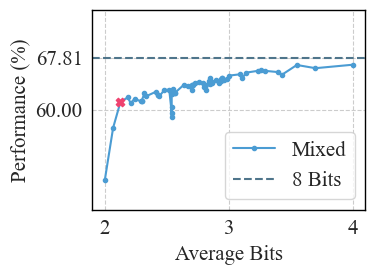

In [28]:
bits = [2, 2.06732452, 2.125890444, 2.184456367, 2.21, 2.24, 2.29, 2.297249998, 2.297249998, 2.32, 2.33, 2.41, 2.432819266, 2.432819266, 2.44, 2.48, 2.52, 2.54, 2.54, 2.54, 2.54, 2.55, 2.568388533, 2.568388533, 2.64, 2.67, 2.7, 2.703957801, 2.703957801, 2.714803342, 2.725648884, 2.758185508, 2.79, 2.798314011, 2.812413215, 2.82, 2.839527069, 2.839527069, 2.844949839, 2.85, 2.85037261, 2.866640922, 2.866640922, 2.867725476, 2.893754776, 2.920868629, 2.920868629, 2.920868629, 2.937136941, 2.94, 2.947982483, 2.947982483, 2.96, 2.99, 3, 3.09, 3.11, 3.14, 3.24, 3.26, 3.29, 3.4, 3.43, 3.55, 3.7, 4]

performance = [0.4943768091, 0.5731534112, 0.6114490253, 0.6187888705, 0.6097278644, 0.616894193, 0.6127, 0.6134044306, 0.6134044306, 0.6249, 0.6201452915, 0.627, 0.6224247968, 0.6224247968, 0.6202, 0.62986864, 0.6303, 0.5956505674, 0.6038685363, 0.5887751257, 0.6243393704, 0.631, 0.6260019339, 0.6260019339, 0.6379698443, 0.636, 0.6304, 0.6366881518, 0.6366881518, 0.6369254122, 0.641072221, 0.6421578897, 0.640108031, 0.633888815, 0.6369942604, 0.6301, 0.6407486339, 0.6407486339, 0.6438557025, 0.639, 0.6480802845, 0.6420126057, 0.6413127025, 0.6410196516, 0.6441660957, 0.6414303748, 0.6403858892, 0.6435680606, 0.6433456726, 0.6466078665, 0.6477399438, 0.6477399438, 0.6456, 0.6465, 0.6513968491, 0.6533887325, 0.6475, 0.6559, 0.6587477512, 0.6598, 0.6587, 0.6567, 0.6528, 0.6674168224, 0.6626, 0.6677875483]


baseline = 0.6780822628 * 100

performance = [p* 100 for p in performance]

sns.set_style("whitegrid")
sns.set_palette("colorblind")
font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 15}
plt.rc('font', **font)
plt.figure(figsize=(4, 3))

ax = plt.gca()
ax.grid(which='major', axis='both', linestyle='--')

# Plot line for mean values
plt.plot(bits, performance,  label="Mixed", color='#4B9CD3', linestyle='-', marker='.')
plt.axhline(y=baseline, label="8 Bits", color="#4F758B", linestyle='--')

# turning_point_x = 2.184456367
turning_point_x = 2.125890444
turning_point_y = 0.6114490253 * 100
plt.scatter([turning_point_x], [turning_point_y], color='#EF426F', marker="X", zorder=2)  # mark the turning point
# plt.annotate('', (turning_point_x, turning_point_y), textcoords="offset points", xytext=(0,0), ha='center')

# Adding titles and labels
# plt.title('Mixtral-8x7B')
plt.xlabel('Average Bits')
plt.ylabel('Performance (%)')
plt.legend(loc="lower right")

ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
ax.set_yticks([60, baseline])
ax.set_ylim([45, 75])
ax.set_xticks([2, 3, 4])
# ax.set_xlim([2, 4])


def _set_boarder(spine):
    spine.set_color('black')
    spine.set_linewidth(1.)


_set_boarder(ax.spines['left'])
_set_boarder(ax.spines['bottom'])
_set_boarder(ax.spines['right'])
_set_boarder(ax.spines['top'])

# Show plot
plt.tight_layout()
plt.savefig("line.pdf", dpi=300)